Fair Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/george/ANKUR/ML_Script/tcga_598_samples_gene_symbol.csv')
df


,Unnamed: 0,TSPAN6,TNMD,DPM1,FGR,CFH,FUCA2,GCLC,NFYA,ENPP4,...,LOC124905143,CERNA2,LCAL1,LOC107986524,H3C2,LOC613266,H3C3,FLJ32255,PTCSC1,label
0,TCGA-78-7166-01A-12R-2066-07,21.0334,0.0000,35.8714,4.1279,16.3254,71.3328,77.4427,17.8349,7.1829,...,0.0000,0.1716,6.1931,0.0000,0.1888,0.0560,0.1324,11.2963,0.0000,Diseased
1,TCGA-38-4630-01A-01R-1206-07,119.7126,2.1388,131.5871,7.9644,18.3103,53.7098,15.5181,74.8848,17.3384,...,0.0175,111.3330,1.1484,0.4525,0.5616,212.0393,1.4341,1.6803,0.1751,Diseased
2,TCGA-50-5932-11A-01R-1755-07,18.5908,0.0919,69.5289,76.0057,57.6112,53.5673,7.6613,24.5466,74.6775,...,0.0000,0.0000,0.0301,0.0000,0.0000,0.0000,0.0000,6.6497,1.4962,Control
3,TCGA-55-1592-01A-01R-0946-07,74.7327,0.1668,109.9944,35.7125,28.3266,45.4316,23.6961,52.9714,62.9999,...,0.0000,0.0000,0.1460,0.0000,0.6425,0.0357,0.0844,12.7485,0.0877,Diseased
4,TCGA-73-4670-01A-01R-1206-07,35.5241,0.0000,128.6215,9.5439,12.0091,99.3343,64.6861,59.9052,14.9771,...,0.0610,0.1143,1.6749,0.0394,1.1180,0.0466,2.9387,0.8876,0.0254,Diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TCGA-49-6745-11A-01R-1858-07,43.4530,0.1835,117.6686,43.2762,46.5480,47.8005,7.8682,15.1391,66.6287,...,0.0000,0.2409,0.0401,1.8935,0.0000,0.0393,0.1858,4.3072,0.2893,Control
594,TCGA-55-8091-01A-11R-2241-07,42.3420,0.0358,78.6861,18.3097,137.0133,48.9458,39.4429,21.1052,14.7233,...,0.0000,0.0000,10.4163,0.1751,0.1035,0.0230,0.0000,10.8367,0.3953,Diseased
595,TCGA-44-2655-01A-01R-0946-07,64.0571,0.1021,86.0001,13.5074,36.2555,61.2118,78.3831,30.0166,40.2318,...,0.0161,0.1609,30.3844,386.6905,0.0000,0.1149,0.0776,9.4376,0.0805,Diseased
596,TCGA-38-7271-01A-11R-2039-07,30.8641,0.0000,57.7683,24.5516,48.9993,35.4312,8.5350,24.9449,24.9257,...,0.0000,0.3405,0.0811,0.1006,0.0000,0.4762,0.5626,11.2273,0.4218,Diseased


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,TSPAN6,TNMD,DPM1,FGR,CFH,FUCA2,GCLC,NFYA,ENPP4,SEMA3F,...,LOC124905143,CERNA2,LCAL1,LOC107986524,H3C2,LOC613266,H3C3,FLJ32255,PTCSC1,label
0,21.0334,0.0000,35.8714,4.1279,16.3254,71.3328,77.4427,17.8349,7.1829,34.2866,...,0.0000,0.1716,6.1931,0.0000,0.1888,0.0560,0.1324,11.2963,0.0000,Diseased
1,119.7126,2.1388,131.5871,7.9644,18.3103,53.7098,15.5181,74.8848,17.3384,121.6088,...,0.0175,111.3330,1.1484,0.4525,0.5616,212.0393,1.4341,1.6803,0.1751,Diseased
2,18.5908,0.0919,69.5289,76.0057,57.6112,53.5673,7.6613,24.5466,74.6775,34.3013,...,0.0000,0.0000,0.0301,0.0000,0.0000,0.0000,0.0000,6.6497,1.4962,Control
3,74.7327,0.1668,109.9944,35.7125,28.3266,45.4316,23.6961,52.9714,62.9999,15.0603,...,0.0000,0.0000,0.1460,0.0000,0.6425,0.0357,0.0844,12.7485,0.0877,Diseased
4,35.5241,0.0000,128.6215,9.5439,12.0091,99.3343,64.6861,59.9052,14.9771,27.8332,...,0.0610,0.1143,1.6749,0.0394,1.1180,0.0466,2.9387,0.8876,0.0254,Diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,43.4530,0.1835,117.6686,43.2762,46.5480,47.8005,7.8682,15.1391,66.6287,22.3199,...,0.0000,0.2409,0.0401,1.8935,0.0000,0.0393,0.1858,4.3072,0.2893,Control
594,42.3420,0.0358,78.6861,18.3097,137.0133,48.9458,39.4429,21.1052,14.7233,19.9098,...,0.0000,0.0000,10.4163,0.1751,0.1035,0.0230,0.0000,10.8367,0.3953,Diseased
595,64.0571,0.1021,86.0001,13.5074,36.2555,61.2118,78.3831,30.0166,40.2318,35.6842,...,0.0161,0.1609,30.3844,386.6905,0.0000,0.1149,0.0776,9.4376,0.0805,Diseased
596,30.8641,0.0000,57.7683,24.5516,48.9993,35.4312,8.5350,24.9449,24.9257,13.1071,...,0.0000,0.3405,0.0811,0.1006,0.0000,0.4762,0.5626,11.2273,0.4218,Diseased


In [4]:
X = df.drop(columns=['label'])  
y = df['label']

In [5]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
unique, counts= np.unique(y, return_counts=True)
dict(zip(unique,counts))

{0: 59, 1: 539}

Text(0, 0.5, 'Number of Samples')

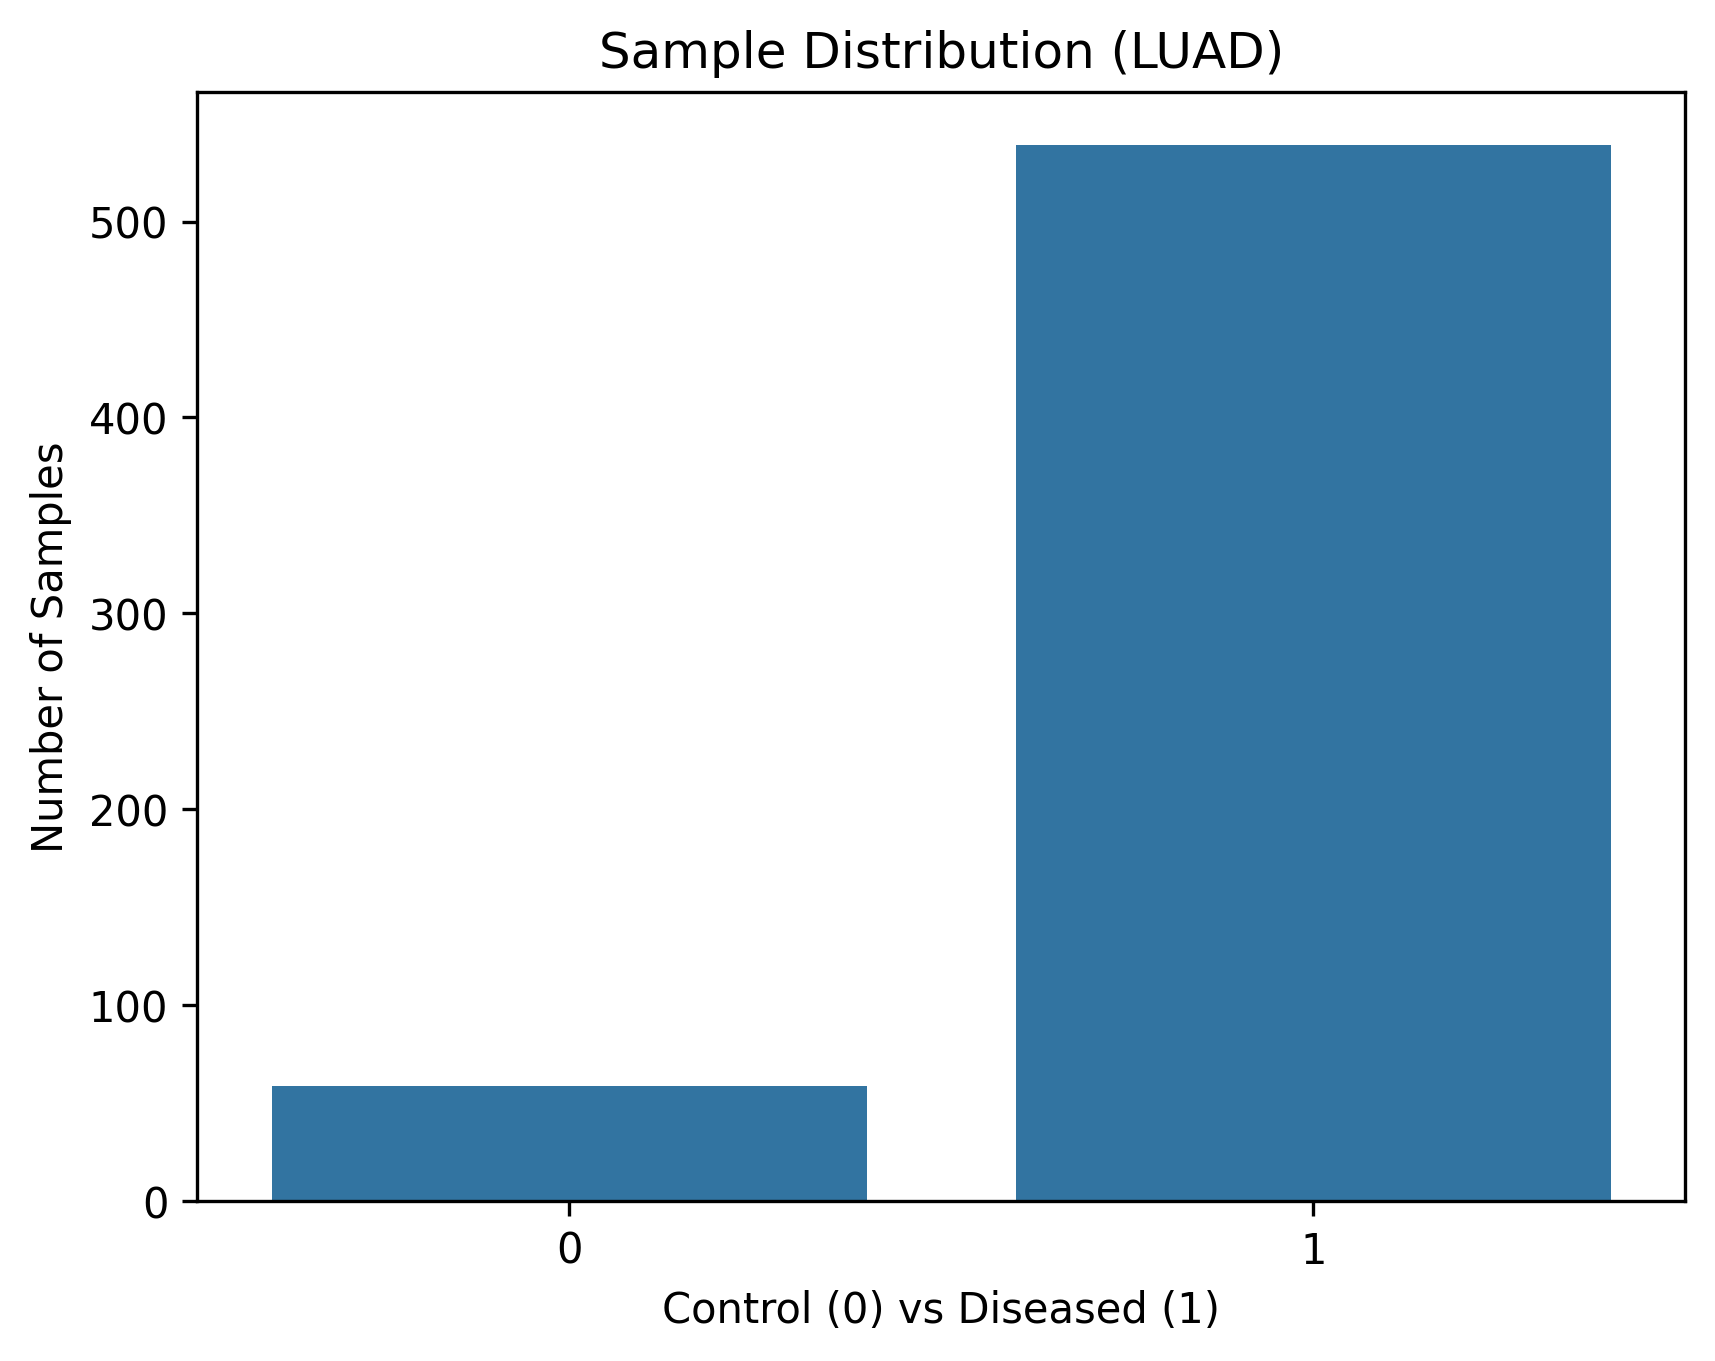

In [7]:
plt.figure(dpi=300)
sns.countplot(x=y)
plt.title("Sample Distribution (LUAD)")
plt.xlabel("Control (0) vs Diseased (1)")
plt.ylabel("Number of Samples")

In [8]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Performing LASSO

In [10]:
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

lasso_cv = LassoCV(alphas=alphas, max_iter=100000)  

lasso_cv.fit(X_train,y_train)

best_alpha = lasso_cv.alpha_
best_lasso_coefficients = lasso_cv.coef_

y_pred_lasso = lasso_cv.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Best Alpha:", best_alpha)
print("Best Coefficients:", best_lasso_coefficients)
print("Mean Squared Error:", mse_lasso)

Best Alpha: 0.01
Best Coefficients: [ 0. -0. -0. ... -0.  0.  0.]
Mean Squared Error: 0.012467133991624158


<Figure size 1000x600 with 0 Axes>

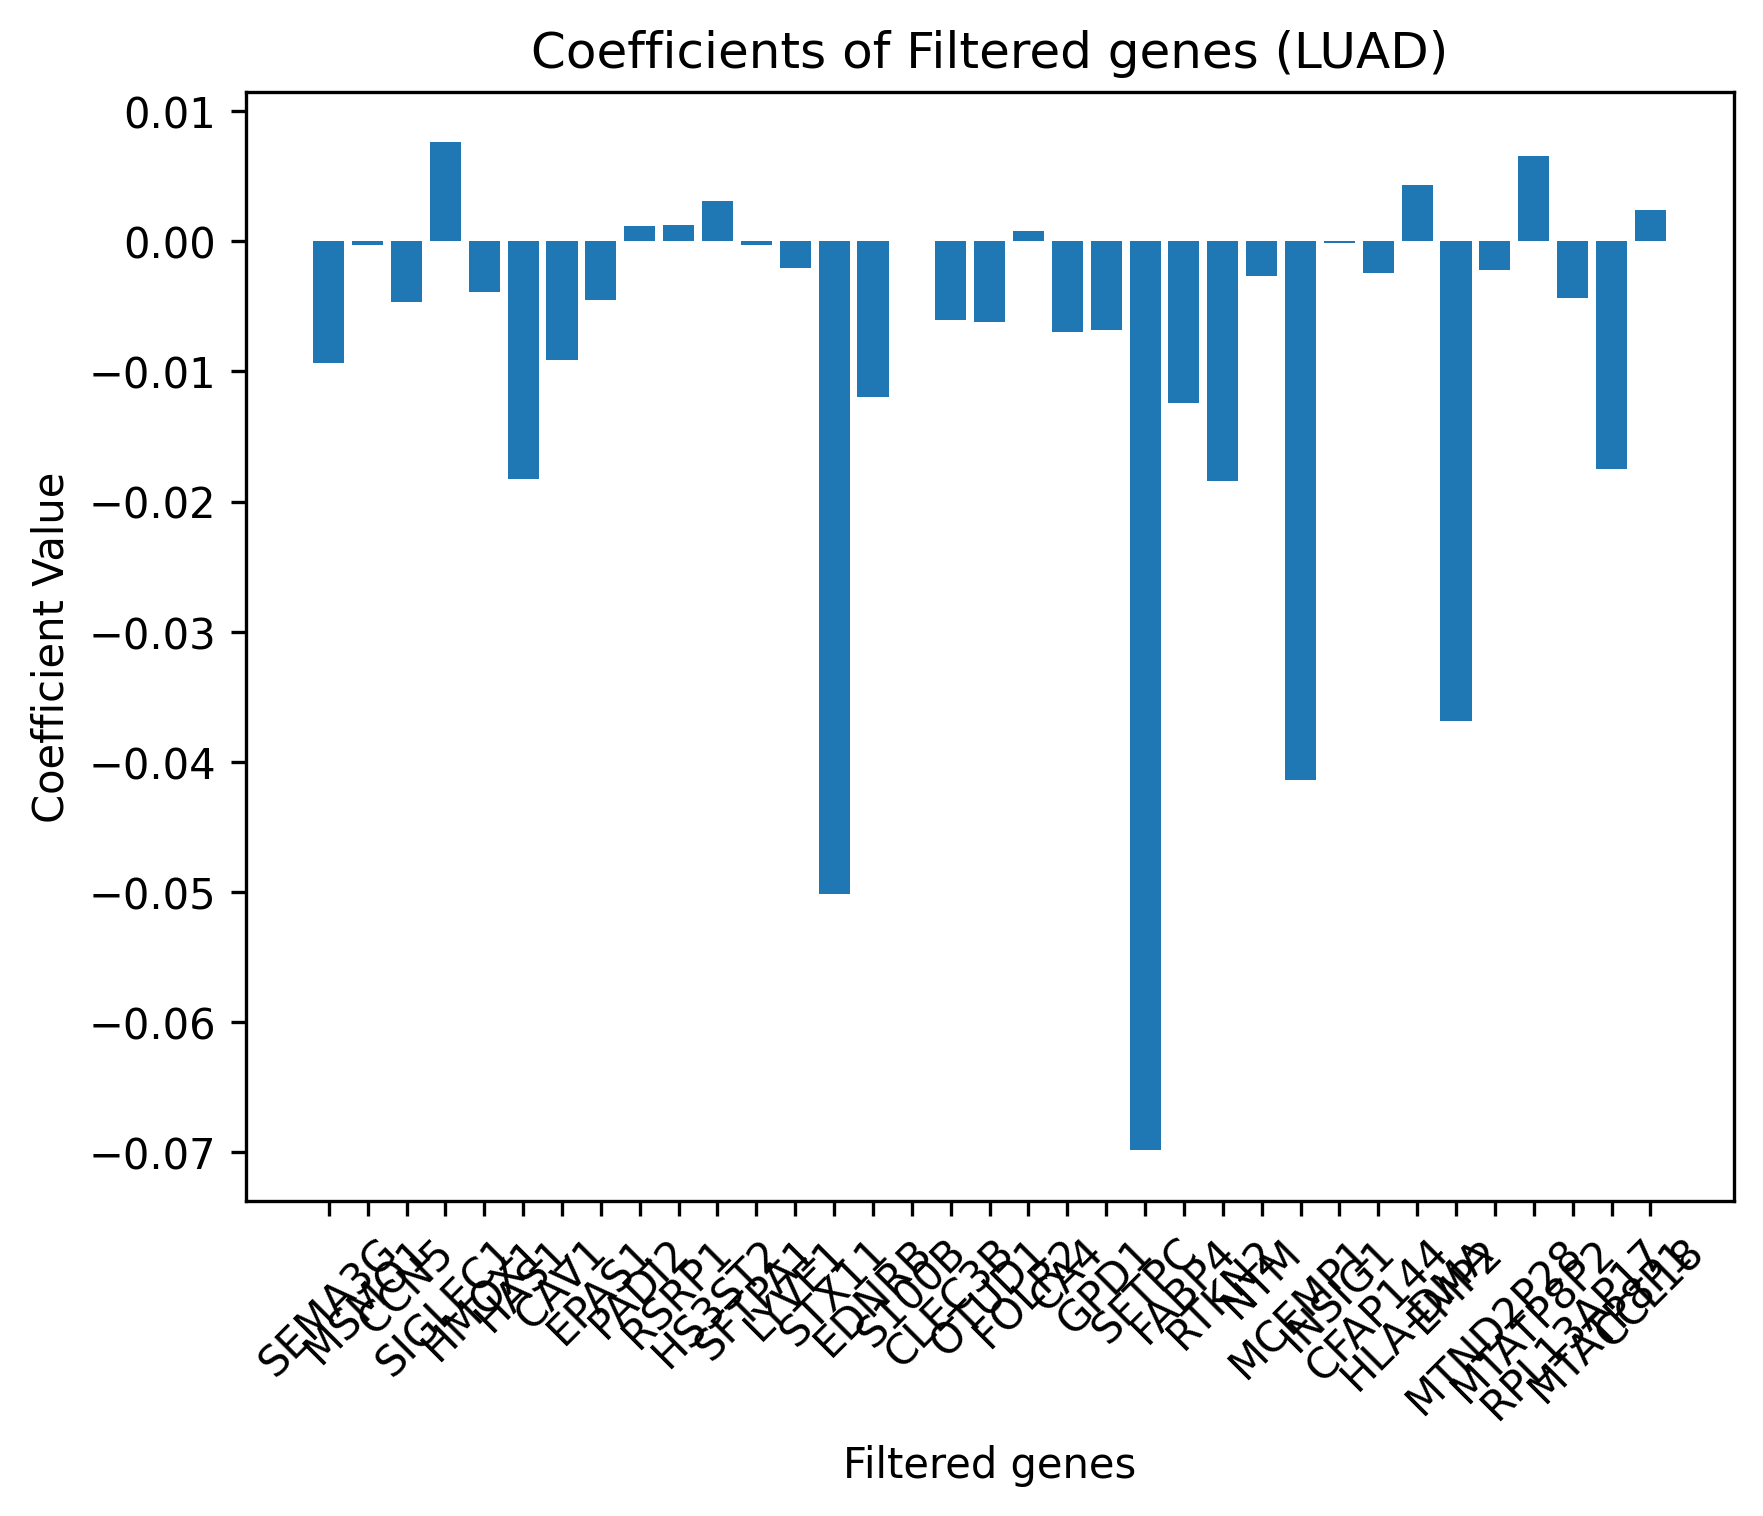

Gene_symbol: SEMA3G, Coefficient: -0.00935475684478007
Gene_symbol: MSMO1, Coefficient: -0.00025586965688937947
Gene_symbol: CCN5, Coefficient: -0.004681403759850553
Gene_symbol: SIGLEC1, Coefficient: 0.007593271009223796
Gene_symbol: HMOX1, Coefficient: -0.003929680570134533
Gene_symbol: HAS1, Coefficient: -0.018233684329312754
Gene_symbol: CAV1, Coefficient: -0.00911098875493134
Gene_symbol: EPAS1, Coefficient: -0.004535453348127164
Gene_symbol: PADI2, Coefficient: 0.0011442252748939835
Gene_symbol: RSRP1, Coefficient: 0.001271963670910338
Gene_symbol: HS3ST2, Coefficient: 0.003088713129797541
Gene_symbol: SFTPA1, Coefficient: -0.00027905670556915233
Gene_symbol: LYVE1, Coefficient: -0.0020792514219090215
Gene_symbol: STX11, Coefficient: -0.050187063980305584
Gene_symbol: EDNRB, Coefficient: -0.011988611860973736
Gene_symbol: S100B, Coefficient: 4.615855628144694e-06
Gene_symbol: CLEC3B, Coefficient: -0.006018084195672153
Gene_symbol: OTUD1, Coefficient: -0.0062221746453204815
Gene_s

In [11]:
filtered_genes_lasso = X.columns[best_lasso_coefficients != 0]
filtered_coeffs_lasso = best_lasso_coefficients[best_lasso_coefficients != 0]
lasso_genes_list = []

plt.figure(figsize=(10, 6))
plt.figure(dpi=300)
plt.bar(filtered_genes_lasso, filtered_coeffs_lasso)
plt.xticks(rotation=45)
plt.xlabel("Filtered genes")
plt.ylabel("Coefficient Value")
plt.title("Coefficients of Filtered genes (LUAD)")
plt.show()

total_genes_selected=0
for gene, coef in zip(filtered_genes_lasso, filtered_coeffs_lasso):
    total_genes_selected+=1
    lasso_genes_list.append(gene)
    print(f"Gene_symbol: {gene}, Coefficient: {coef}")


with open("/home/george/lasso_genes.txt", "w") as file:
    for gene in lasso_genes_list:
        file.write(gene + "\n")

print()
print("The total number of genes selected is: ", total_genes_selected)

Building the networkx model, using the lasso genes

In [11]:
import networkx as net

In [12]:
with open("/home/george/lasso_genes.txt", "r") as file:
    selected_genes = [line.strip() for line in file]

filtered_df = df[selected_genes + ['label']]
filtered_df

,SEMA3G,MSMO1,CCN5,SIGLEC1,HMOX1,HAS1,CAV1,EPAS1,PADI2,RSRP1,...,INSIG1,CFAP144,HLA-DMA,EMP2,MTND2P28,MTATP8P2,RPL13AP17,MTATP8P1,CCL18,label
0,1.0006,87.5344,2.0795,0.9259,36.7842,0.2587,15.9754,52.3690,0.4289,11.7962,...,14.4267,0.8013,25.1209,45.0383,457.7330,2.5479,0.0296,3.2633,12.1800,Diseased
1,7.1728,103.2277,0.2058,14.1408,41.3534,0.2381,26.4875,47.7287,13.8778,30.5382,...,59.3626,0.4377,45.0814,24.6736,261.0667,1.2178,0.0000,1.3864,118.2372,Diseased
2,71.4277,135.0527,38.4598,51.2492,71.2566,23.0200,2048.8467,1694.2214,3.8865,8.8436,...,92.7857,10.4536,258.7235,538.1031,319.7196,0.6712,29.6142,0.6550,165.8751,Control
3,7.3671,91.6341,5.3967,19.5571,462.9686,0.3117,87.7557,162.4193,45.8345,32.1244,...,123.9060,5.0143,183.7990,118.7029,530.9996,13.2058,6.2600,5.7495,716.4851,Diseased
4,2.0162,76.8437,5.1038,6.4746,114.0986,2.2814,32.5020,187.7717,1.5889,12.8496,...,52.5893,1.2283,32.0780,21.3769,133.4156,3.3584,0.1810,2.4148,203.6339,Diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,9.1954,263.9049,36.8338,15.1475,68.0502,12.5066,1329.4419,602.1102,0.9631,4.9773,...,74.0130,195.8959,280.7586,423.9618,136.3862,0.8940,21.0954,1.3085,176.7240,Control
594,4.3692,383.5907,6.6247,10.7559,127.7994,0.6143,63.3942,162.4506,5.6230,32.9700,...,135.1579,20.1989,400.3422,30.0404,429.2777,2.0943,0.4386,2.8101,109.6009,Diseased
595,4.3390,151.8757,14.6800,4.2968,75.5626,0.2021,200.0528,230.9664,2.1233,11.0274,...,27.1688,4.3370,453.5980,103.1547,181.0559,7.2771,2.6922,4.9163,158.8136,Diseased
596,5.3095,53.4666,6.9901,8.0790,90.1575,8.0638,78.3739,232.8207,4.6332,4.1578,...,39.2051,1.2974,192.3823,55.2857,395.3135,0.9024,1.5541,1.7613,177.8150,Diseased


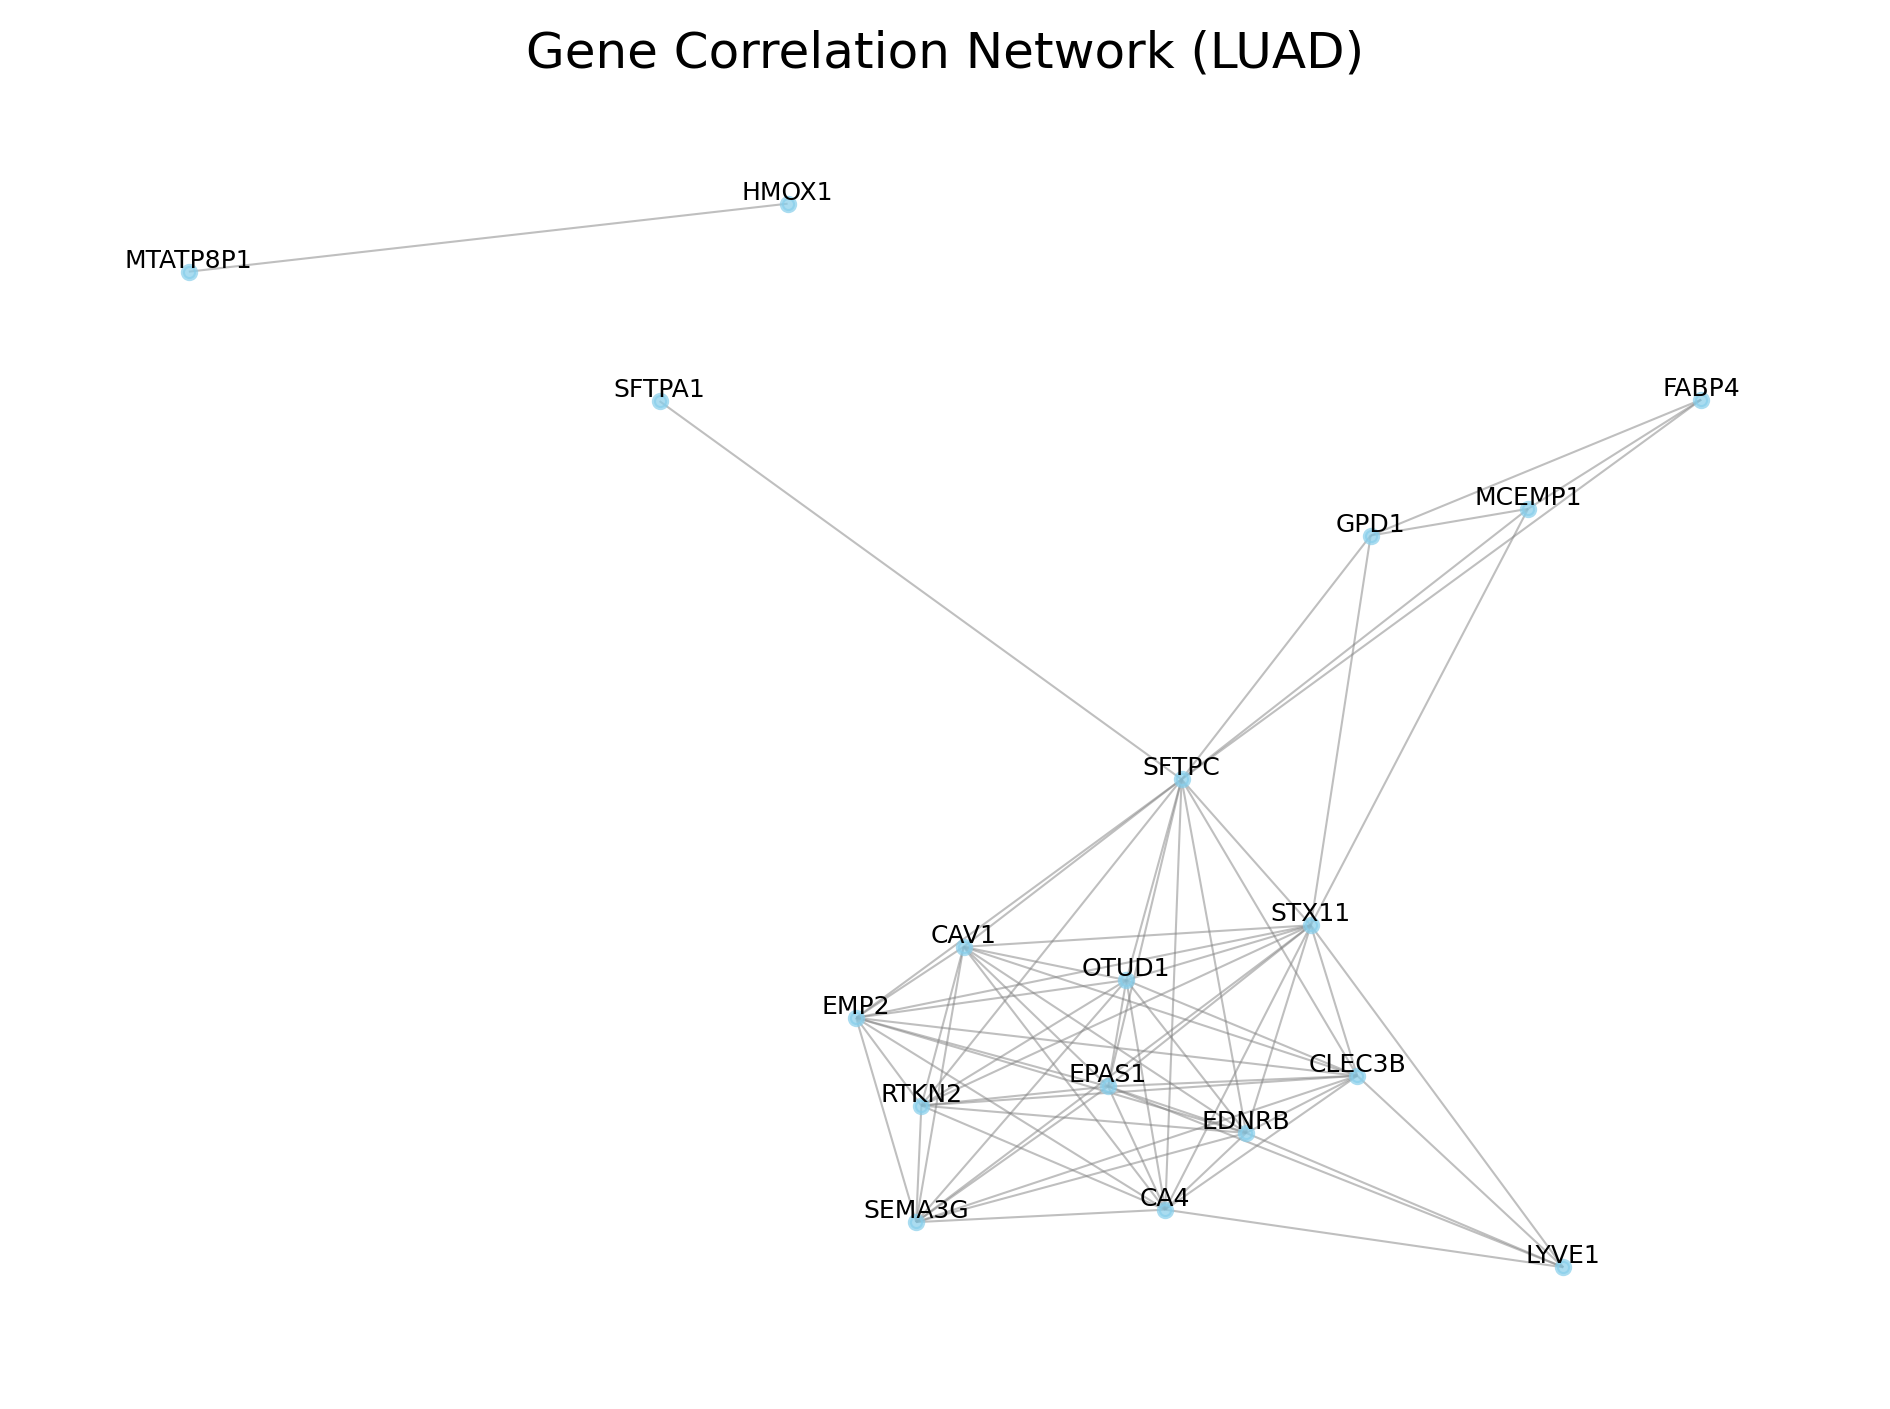

In [13]:
plt.figure(dpi=300)
G= net.Graph()
X_filtered = filtered_df.drop(columns=['label'])
labels = filtered_df['label']
gene_correlation_matrix = X_filtered.corr()
threshold = 0.7

genes = X_filtered.columns
for gene in genes:
    G.add_node(gene, label='Gene')

for gene1 in genes:
    for gene2 in genes:
        if gene1 != gene2 and abs(gene_correlation_matrix[gene1][gene2]) > threshold:
            G.add_edge(gene1, gene2, weight=gene_correlation_matrix[gene1][gene2])

filtered_genes = [node for node in G.nodes if G.degree[node] > 0]

filtered_G = G.subgraph(filtered_genes)

pos = net.spring_layout(filtered_G, k=0.8)  

node_labels = {gene: gene for gene in filtered_genes}

net.draw_networkx_nodes(filtered_G, pos, node_size=10, node_color='skyblue', alpha=0.7)
net.draw_networkx_labels(filtered_G, pos, labels=node_labels, font_size=6, font_color='black', verticalalignment='bottom')

edges = filtered_G.edges()
net.draw_networkx_edges(filtered_G, pos, edgelist=edges, edge_color='gray', width=0.5, alpha=0.5)

plt.title('Gene Correlation Network (LUAD)')
plt.axis('off')  
plt.tight_layout()
plt.show()

SHAPley explaianble AI

XGBoost

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import shap

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import xgboost as xgb


In [16]:
k=3
random_state = 42
xgbm = xgb.XGBClassifier()
kf = KFold(n_splits=k,random_state=random_state, shuffle=True)
cv_scores = cross_val_score(xgbm, X_filtered, y, cv=kf)
mean_cv_score = np.mean(cv_scores)
print("Cross-validation Scores:", cv_scores)
print("Accuracy:", mean_cv_score )

Cross-validation Scores: [0.995      0.99497487 0.98994975]
Accuracy: 0.9933082077051926


In [ ]:
## DO NOT RUN - xgbm.fit(X_train, y_train)

Confusion Matrix:
[[ 57   2]
 [  2 537]]


<Axes: title={'center': 'LUAD Confusion Matrix (K = 3)'}>

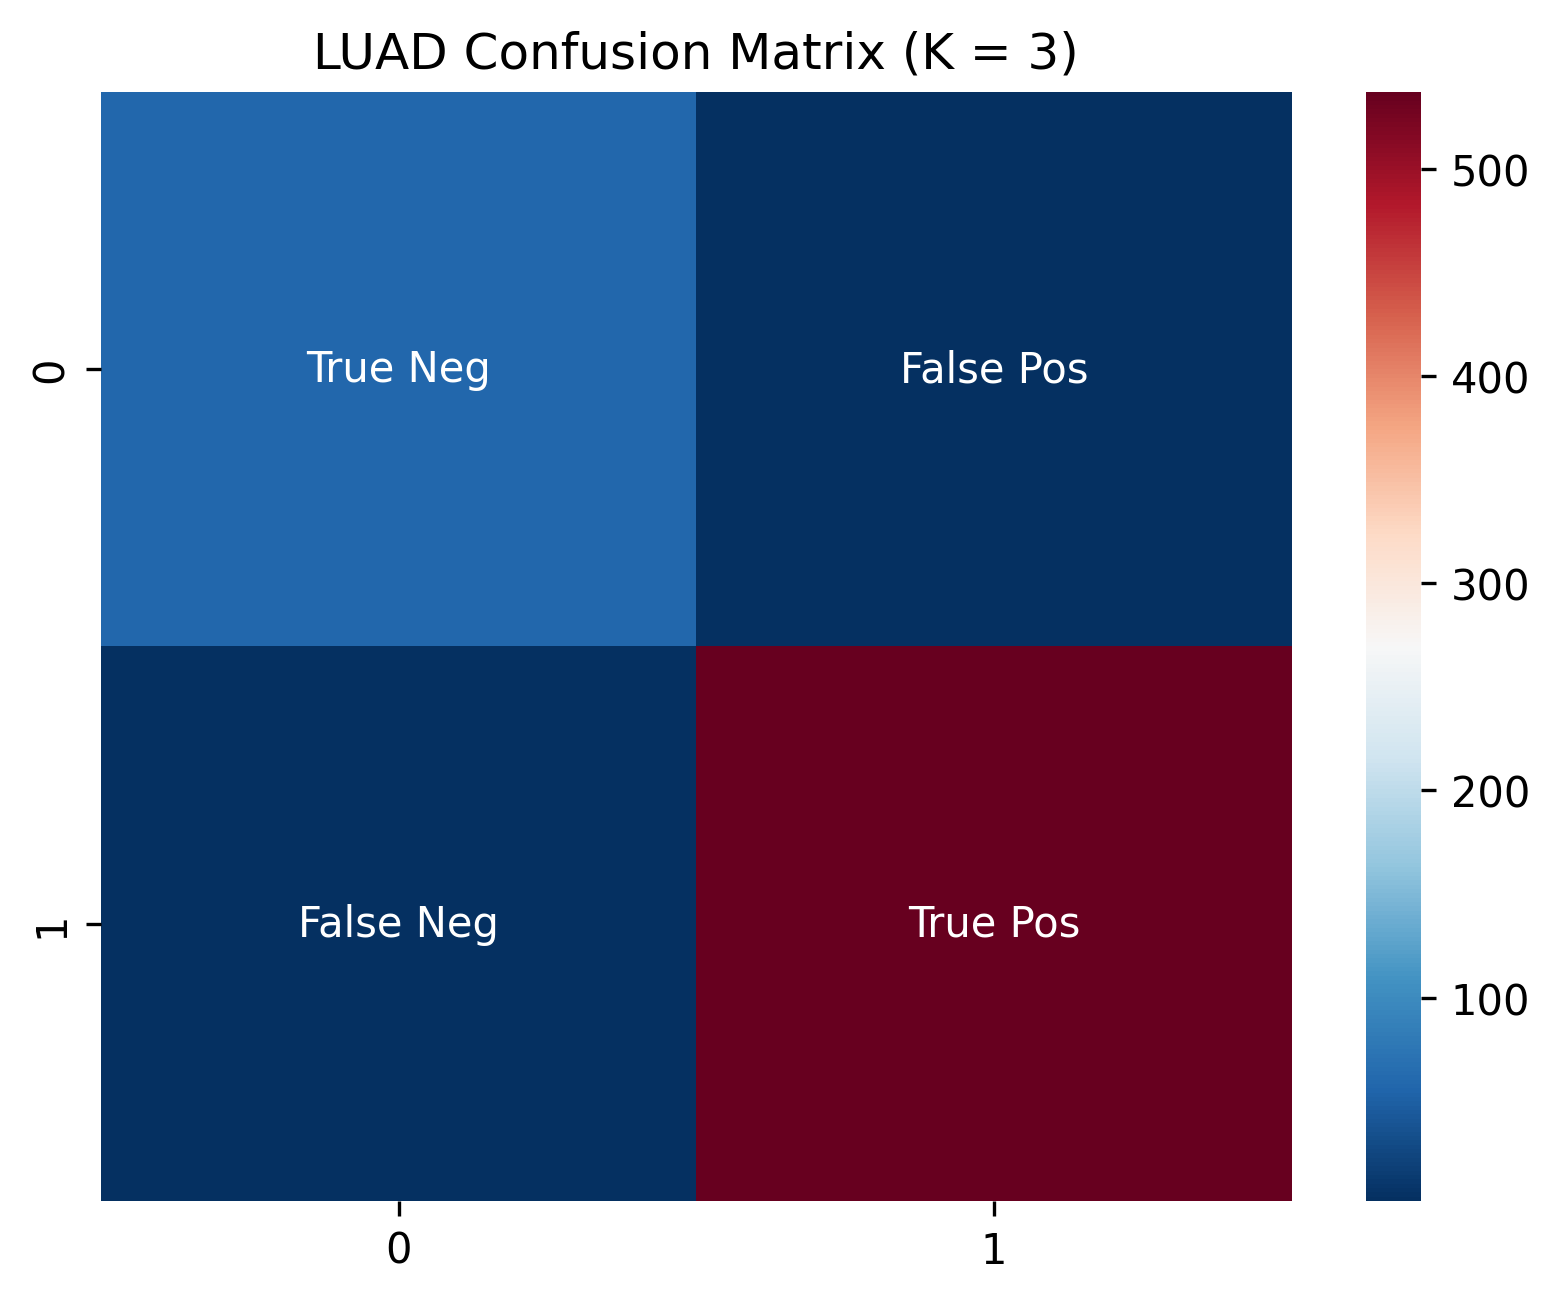

In [21]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix

k = 3
random_state = 42
xgbm = xgb.XGBClassifier()
kf = KFold(n_splits=k, random_state=random_state, shuffle=True)

# Perform cross-validation and get predicted labels
predicted = cross_val_predict(xgbm, X_filtered, y, cv=kf)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, predicted)

print("Confusion Matrix:")
print(conf_matrix)
plt.figure(dpi=300)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
plt.title("LUAD Confusion Matrix (K = 3)")
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='RdBu_r')



<Figure size 640x480 with 0 Axes>

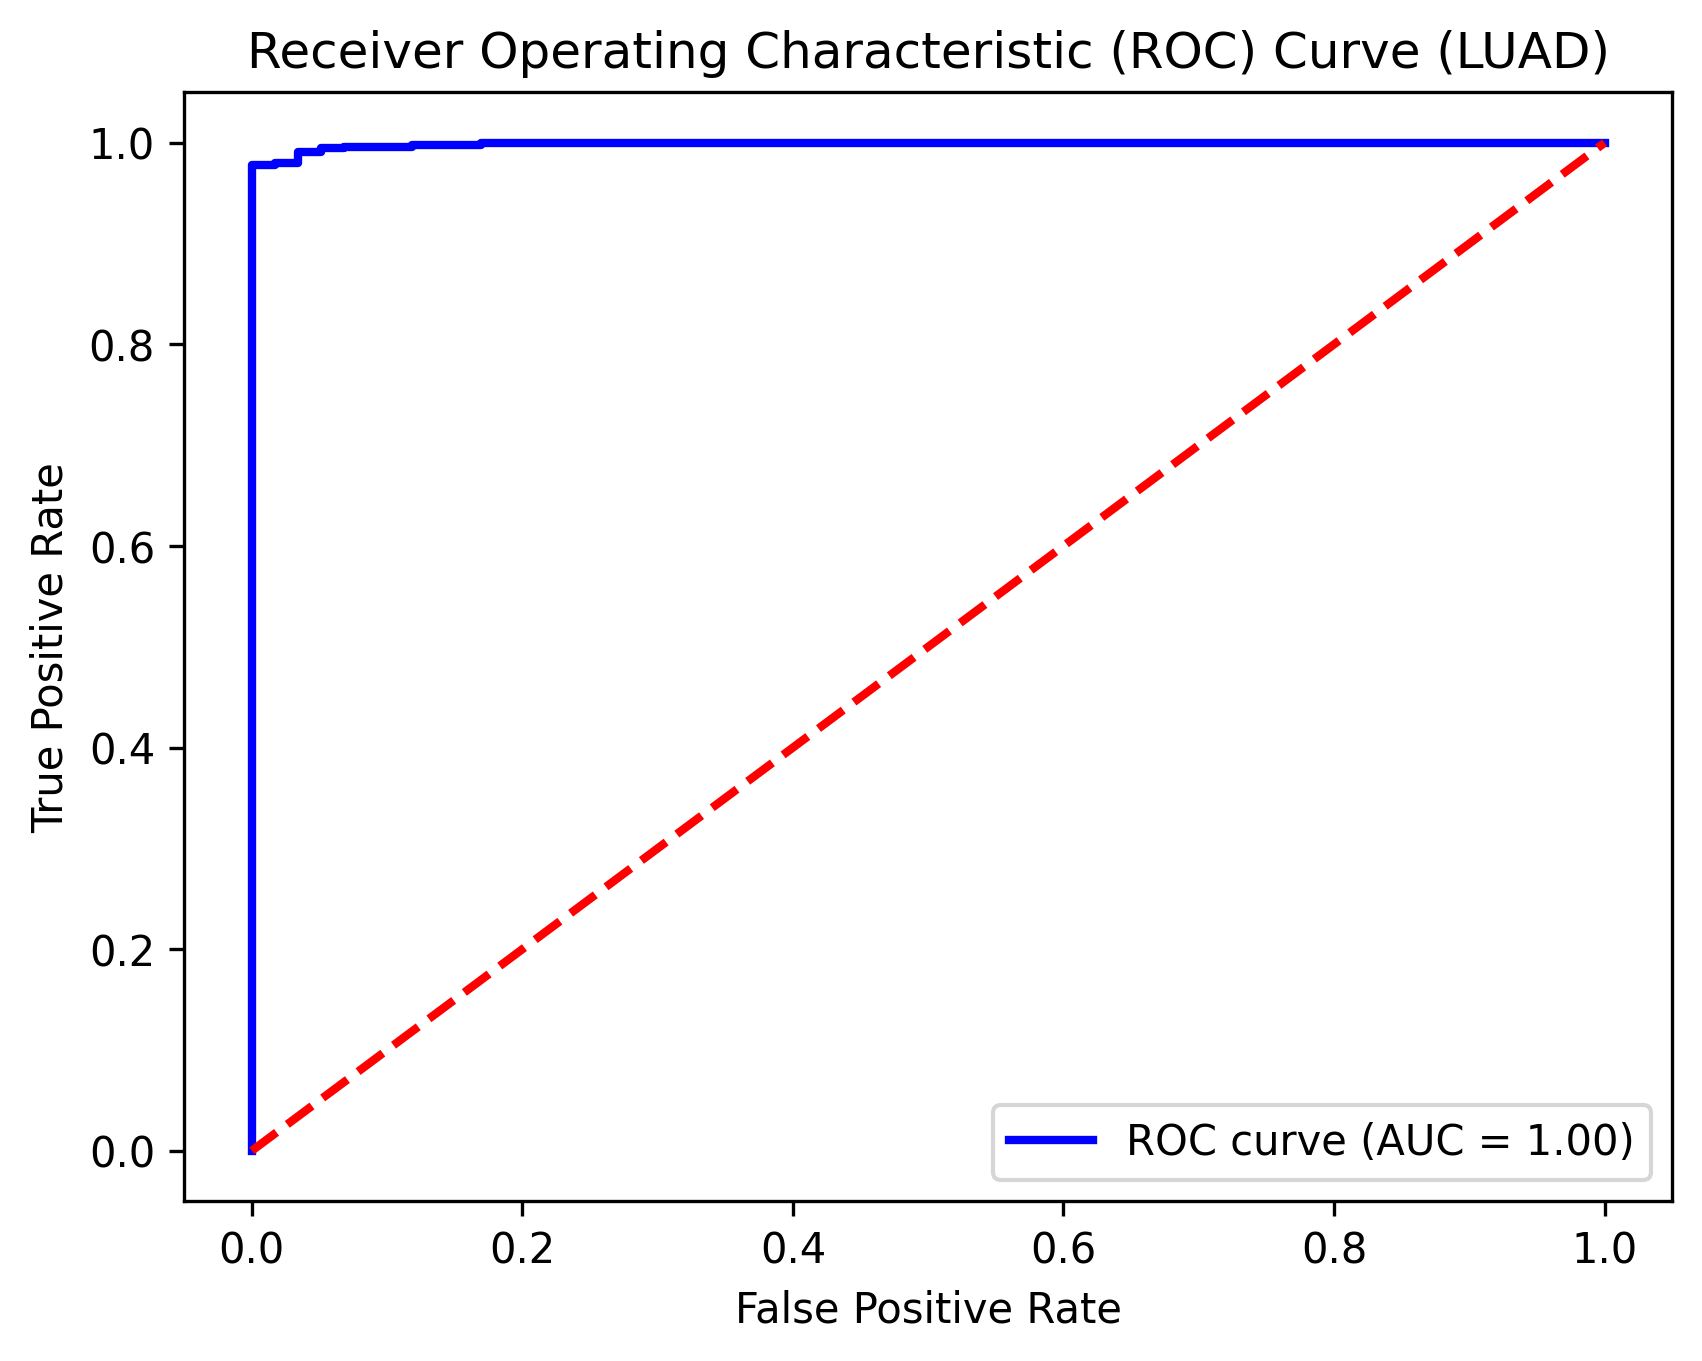

In [19]:
pred_prob = cross_val_predict(xgbm, X_filtered, y, cv=kf, method='predict_proba')
fpr, tpr, thresholds = roc_curve(y, pred_prob[:, 1])
auc = roc_auc_score(y, pred_prob[:, 1])
plt.figure()
plt.figure(dpi=300)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (LUAD)')
plt.legend(loc="lower right")
plt.show()

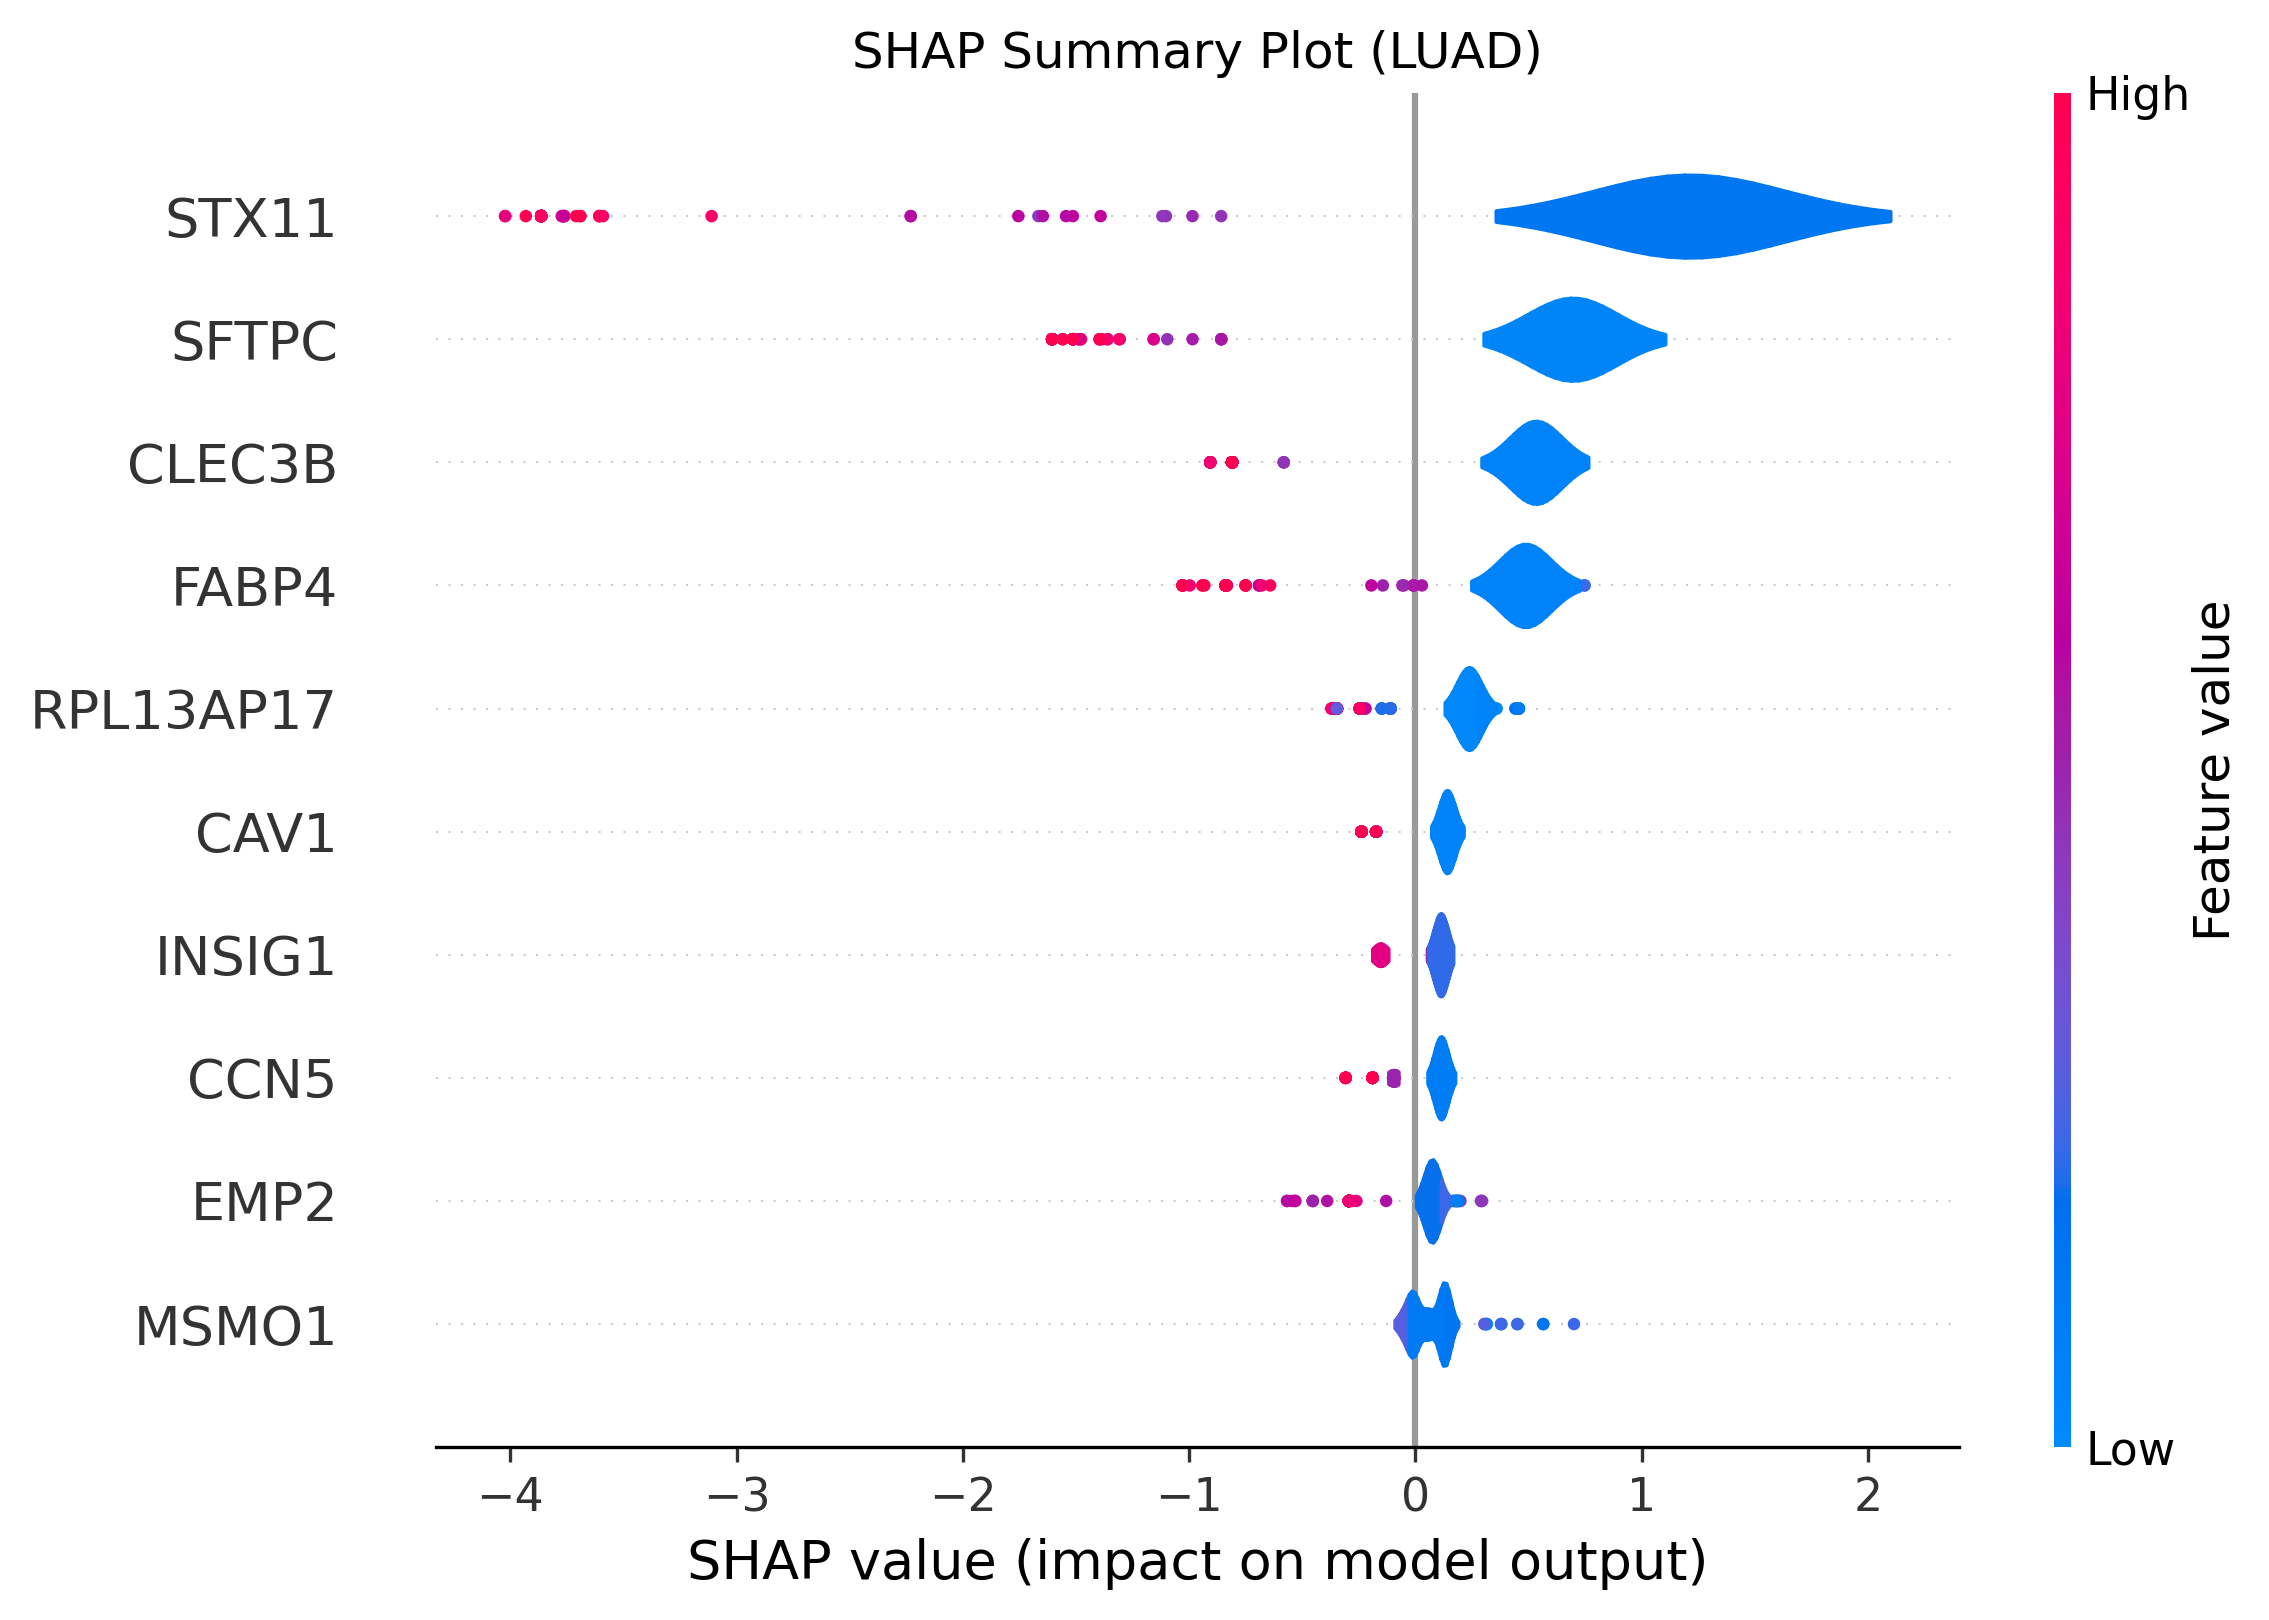

In [20]:
xgbm.fit(X_filtered, y)
plt.figure(dpi=300)
plt.title("SHAP Summary Plot (LUAD)")
explainer = shap.Explainer(xgbm)
shap_values = explainer.shap_values(X_filtered)
shap.summary_plot(shap_values, X_filtered, max_display=10, plot_type="violin")

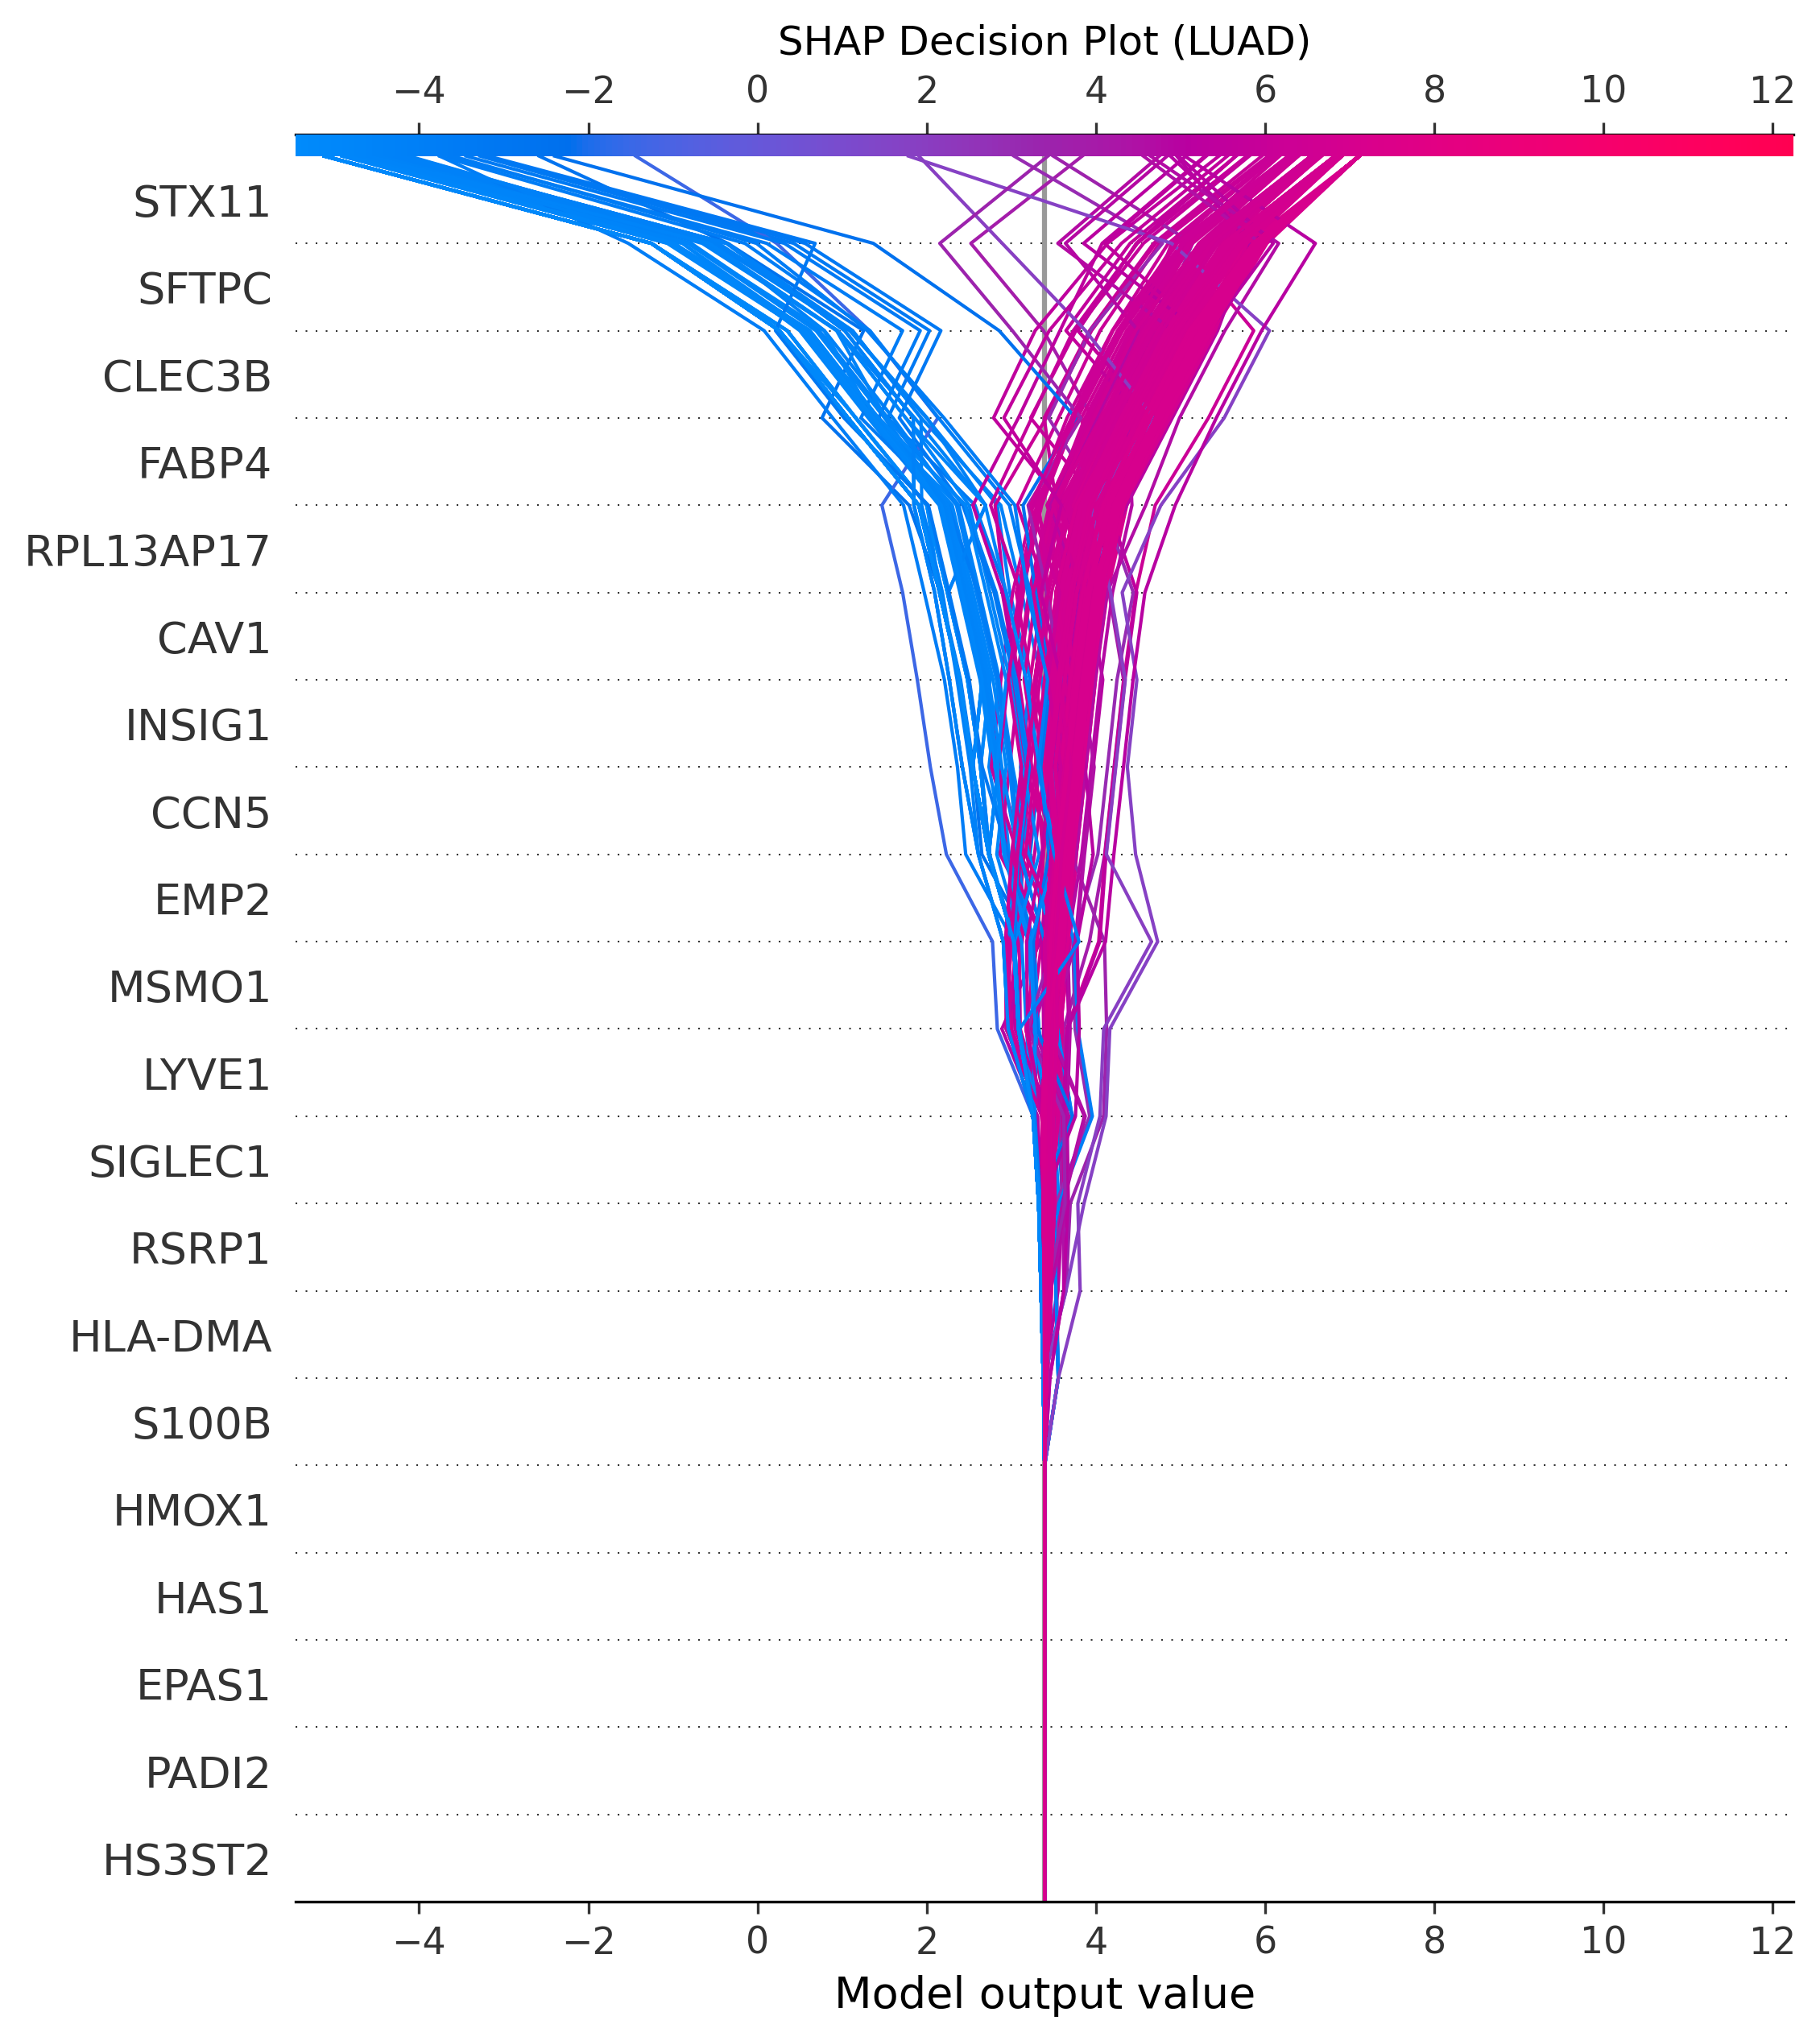

In [40]:
plt.figure(dpi=300)
plt.title("SHAP Decision Plot (LUAD)")
shap.decision_plot(explainer.expected_value, shap_values, X_filtered)
plt.show()

In [30]:
choosen_instance = X_filtered.loc[[67]]
choosen_instance

,SEMA3G,MSMO1,CCN5,SIGLEC1,HMOX1,HAS1,CAV1,EPAS1,PADI2,RSRP1,...,MCEMP1,INSIG1,CFAP144,HLA-DMA,EMP2,MTND2P28,MTATP8P2,RPL13AP17,MTATP8P1,CCL18
67,6.2863,131.3175,3.0365,14.8116,92.6703,0.8448,28.5021,114.1032,5.1893,35.3874,...,15.8088,106.6218,4.6256,160.0358,149.4928,1281.6831,1.1699,0.245,1.1417,67.0291


In [31]:
plt.figure(dpi=300)
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)

<Figure size 1920x1440 with 0 Axes>